![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Assignement Week 3 and 4

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-10-29)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/exercises/Session_3_4_EXERCISES.ipynb)


# PANDAS

## Groupby exersises

Import this [dataset](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user)

*   What is the mean age per occupation?
*   What is the male ratio per occupation, sort it from the most to the least. Do the same for women
*   For each occupation, calculate the minimum and maximum ages
* For each combination of occupation and gender, calculate the mean age
* For each occupation present the percentage of women and men



In [8]:
# Within IPython notebook, add multiple print capabilities
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

df = pd.read_csv(url, delimiter = "|", index_col = "user_id")
df

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


In [10]:
# What is the mean age per occupation


df_age_occupation = df[['occupation', 'age']]
mean_age_occupation = df_age_occupation.groupby('occupation').mean()
mean_age_occupation.sort_values(by='age', axis='index', ascending=False)

,age
occupation,
retired,63.071429
doctor,43.571429
educator,42.010526
healthcare,41.562500
librarian,40.000000
administrator,38.746835
executive,38.718750
marketing,37.615385
lawyer,36.750000


In [11]:
# What is the male ratio per occupation, sort it from the most to the least. Do the same for women

df_gender_occupation = df[['gender', 'occupation']]
# Here we slice the dataframe


df_M = df_gender_occupation[df_gender_occupation['gender'] == 'M'].groupby('occupation').count()
# Here we are filtering the dataframe under a condition, and then using groupby
df_F = df_gender_occupation[df_gender_occupation['gender'] == "F"].groupby('occupation').count()
df_F = df_F.fillna(0)


df_M_F = pd.concat([df_M, df_F], axis = 1) 
# concat joins the two dataframes together axis = 1 refers to columns
df_M_F.columns = ('Male', 'Female')
df_M_F = df_M_F.fillna(0)



df_M_F['Male Ratio'] =  df_M_F['Male'] / (df_M_F['Male'] + df_M_F['Female'])       
# adds a new column to our data frame and puts it equal to the ratio

df_M_F['Female Ratio'] = df_M_F['Female'] / (df_M_F['Male'] + df_M_F['Female'])

df_M_F

,Male,Female,Male Ratio,Female Ratio
administrator,43,36.0,0.544304,0.455696
artist,15,13.0,0.535714,0.464286
doctor,7,0.0,1.000000,0.000000
educator,69,26.0,0.726316,0.273684
engineer,65,2.0,0.970149,0.029851
entertainment,16,2.0,0.888889,0.111111
executive,29,3.0,0.906250,0.093750
healthcare,5,11.0,0.312500,0.687500
homemaker,1,6.0,0.142857,0.857143
lawyer,10,2.0,0.833333,0.166667


In [12]:
# For each occupation, calculate the minimum and maximum ages

min_age = df_age_occupation.groupby('occupation').min()
min_age.sort_values(by='age', axis='index', ascending=False)


max_age = df_age_occupation.groupby('occupation').max()
max_age.sort_values(by='age', axis='index', ascending=False)

,age
occupation,
retired,51
doctor,28
marketing,24
librarian,23
educator,23
scientist,23
engineer,22
executive,22
healthcare,22


,age
occupation,
retired,73
administrator,70
engineer,70
executive,69
librarian,69
salesman,66
other,64
doctor,64
educator,63


In [13]:
# For each combination of occupation and gender, calculate the mean age

df_male_gender = df[df['gender'] == 'M']
df_male_gender = df_male_gender[['occupation', 'age']]
df_male_gender.groupby('occupation').mean()


df_female_gender = df[df['gender'] == 'F']
df_female_gender = df_female_gender[['occupation', 'age']]
df_female_gender.groupby('occupation').mean()

,age
occupation,
administrator,37.162791
artist,32.333333
doctor,43.571429
educator,43.101449
engineer,36.600000
entertainment,29.000000
executive,38.172414
healthcare,45.400000
homemaker,23.000000


,age
occupation,
administrator,40.638889
artist,30.307692
educator,39.115385
engineer,29.500000
entertainment,31.000000
executive,44.000000
healthcare,39.818182
homemaker,34.166667
lawyer,39.500000


,Male Ratio,Female Ratio
administrator,0.544304,0.455696
artist,0.535714,0.464286
doctor,1.000000,0.000000
educator,0.726316,0.273684
engineer,0.970149,0.029851
entertainment,0.888889,0.111111
executive,0.906250,0.093750
healthcare,0.312500,0.687500
homemaker,0.142857,0.857143
lawyer,0.833333,0.166667


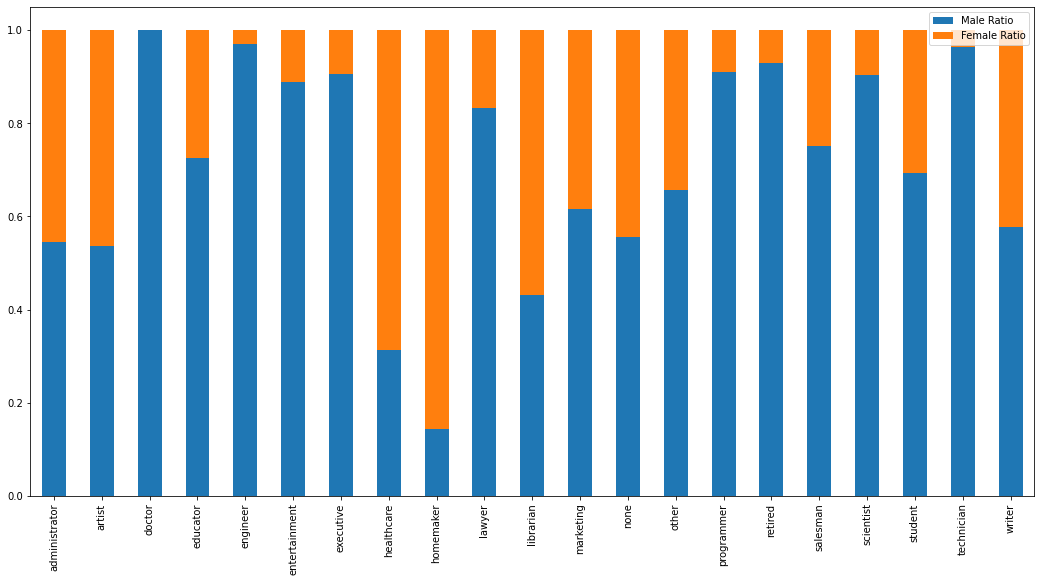

In [14]:
# For each occupation present the percentage of women and men

new_M_F = df_M_F[['Male Ratio', 'Female Ratio']]
new_M_F

new_M_F.plot.bar(stacked=True, figsize=(18,9))

## Apply exercises

Import this [dataset](https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/US_Crime_Rates_1960_2014.csv)

* What is the type of the columns?
* Convert the type of the column Year to datetime64
* Set the Year column as the index of the dataframe
* Delete the Total column
* Group the year by decades and sum the values (take care with population values) 
* What is the most dangerous decade to live in the US?


In [15]:
url = 'https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/US_Crime_Rates_1960_2014.csv'

crime = pd.read_csv(url)
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [16]:
# What is the type of the columns?

crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                55 non-null     int64
 1   Population          55 non-null     int64
 2   Total               55 non-null     int64
 3   Violent             55 non-null     int64
 4   Property            55 non-null     int64
 5   Murder              55 non-null     int64
 6   Forcible_Rape       55 non-null     int64
 7   Robbery             55 non-null     int64
 8   Aggravated_assault  55 non-null     int64
 9   Burglary            55 non-null     int64
 10  Larceny_Theft       55 non-null     int64
 11  Vehicle_Theft       55 non-null     int64
dtypes: int64(12)
memory usage: 5.3 KB


In [17]:
# Convert the type of the column Year to datetime64

crime.Year = pd.to_datetime(crime.Year, format = '%Y')
crime.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                55 non-null     datetime64[ns]
 1   Population          55 non-null     int64         
 2   Total               55 non-null     int64         
 3   Violent             55 non-null     int64         
 4   Property            55 non-null     int64         
 5   Murder              55 non-null     int64         
 6   Forcible_Rape       55 non-null     int64         
 7   Robbery             55 non-null     int64         
 8   Aggravated_assault  55 non-null     int64         
 9   Burglary            55 non-null     int64         
 10  Larceny_Theft       55 non-null     int64         
 11  Vehicle_Theft       55 non-null     int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 5.3 KB


In [18]:
# Set the Year column as the index of the dataframe


crime = crime.set_index('Year', drop = True)
crime.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [19]:
# Delete the Total column

del crime['Total']

crime.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [20]:
# Group the year by decades and sum the values (take care with population values)

crime_decade = crime.resample('10AS').sum()
crime_decade.head(8)

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,1915053175,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,2121193298,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,2371370069,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,2612825258,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,2947969117,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,1570146307,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [21]:
# What is the most dangerous decade to live in the US?, 

# Getting data again since total was deleted

url = 'https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/US_Crime_Rates_1960_2014.csv'

crime = pd.read_csv(url)


crime.Year = pd.to_datetime(crime.Year, format = '%Y')
crime = crime.set_index('Year', drop = True)


crime_decade = crime.resample('10AS').sum()
crime_decade


crime_decade['Total'].max()
"  "
crime_decade['Total'].idxmax()

# The 1990's was the most dangerous decade

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,1915053175,49295900,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,2121193298,100991600,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,2371370069,131123369,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,2612825258,136582146,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,2947969117,115012044,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,1570146307,50167967,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


136582146

'  '

Timestamp('1990-01-01 00:00:00', freq='10AS-JAN')

# SQLite and Pandas

## SQLite, Pandas and the world of tips

Given [this](https://github.com/vfp1/bts-dsf-2020/blob/main/data/tips.csv) CSV file. Do the following:

* Load it in Pandas
* Save the `DataFrame` as SQLite
* Reply the following questions by slicing the SQLite database with SQL queries and then using Pandas for analysis:
    * Who is most likely to receive a tip during weekday? A Female or a Male? 
    * And during weekends?
    * What is the table size that is most likely to bring a better tip?
    * Who are giving more tips, smokers or non smokers? 

In [22]:
# Load it in Pandas

import pandas as pd
import numpy as np
import sqlite3

url = 'https://github.com/vfp1/bts-dsf-2020/raw/main/data/tips.csv'

tips = pd.read_csv(url)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
#Save the DataFrame as SQLite
import sqlite3

cnx = sqlite3.connect('tips.db')
tips.to_sql(name='tips', con=cnx)

In [24]:
"""First lets create some UTIL functions"""

def create_connect_database(db_name):
  connection = sqlite3.connect(db_name)
  cursor = connection.cursor()

  return connection, cursor


def commit_close(connection, cursor, close_connection=True):
  connection.commit()

  if close_connection == True:
    connection.close()
    cursor.close()

  else:
    pass




'First lets create some UTIL functions'

In [25]:
"""Here I am just exploring the dataset"""


####### Getting Table Name ############


import sqlite3

connection, cursor = create_connect_database('tips.db')

cursor.execute("SELECT name FROM SQLite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)


####### Getting The  Columns In Each Table ######
 
for table in tables:
    print("Table name", table[0])
    cursor.execute('PRAGMA TABLE_INFO({});'.format(table[0]))

    # collect names in a list
    names = [tup[1] for tup in cursor.fetchall()]
    print(names)


######## Getting the rows in each table ###########

for table in tables:
    num_rows = cursor.execute('SELECT COUNT(*) FROM {};'.format(table[0]))
    values = num_rows.fetchone()
    print("Table", table[0], "contains", values[0], "rows")

'Here I am just exploring the dataset'

[('tips',)]
Table name tips


['index', 'total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']
Table tips contains 244 rows


In [26]:
#Reply the following questions by slicing the SQLite database with SQL queries 
#and then using Pandas for analysis:

#Who is most likely to receive a tip during weekday? A Female or a Male?


tips = pd.read_sql_query('SELECT * FROM tips', connection)
tips

,index,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


In [27]:
tips = pd.read_sql_query("SELECT sex, day, COUNT(tip) FROM tips GROUP BY day, sex", connection)
tips.iloc[:]

tips.iloc[2:6]

,sex,day,COUNT(tip)
0,Female,Fri,9
1,Male,Fri,10
2,Female,Sat,28
3,Male,Sat,59
4,Female,Sun,18
5,Male,Sun,58
6,Female,Thur,32
7,Male,Thur,30


,sex,day,COUNT(tip)
2,Female,Sat,28
3,Male,Sat,59
4,Female,Sun,18
5,Male,Sun,58


In [28]:
query = """ SELECT sex, CASE                                       
              WHEN(day != 'Sat') and (day != 'Sun') THEN 'weekday'  
              ELSE 'weekend'

              END as weekday_weekend, count(tip)


              FROM tips

              GROUP BY sex, 

              CASE 

              WHEN(day != 'Sat') and (day != 'Sun') THEN 'weekday'
              ELSE 'weekend'

              END 
              
                             """      

tips = pd.read_sql_query(query, connection)
tips



# CASE is a function in sql which will run through a series of conditions and return the first result 
# where the condition is true     
# 'End' ends the statement block                           

,sex,weekday_weekend,count(tip)
0,Female,weekday,41
1,Female,weekend,46
2,Male,weekday,40
3,Male,weekend,117


In [29]:
#What is the table size that is most likely to bring a better tip?

tips = pd.read_sql_query("SELECT size, COUNT(tip) FROM tips GROUP BY size", connection)
tips

maxtips = tips['COUNT(tip)'].max()
tablemaxtips = tips.iloc[tips['COUNT(tip)'].idxmax(), 0]

print(f"Tables of size {tablemaxtips} gave the most tips tipping {maxtips} times")

,size,COUNT(tip)
0,1,4
1,2,156
2,3,38
3,4,37
4,5,5
5,6,4


Tables of size 2 gave the most tips tipping 156 times


In [30]:
#Who are giving more tips, smokers or non smokers?

# We can see below that according to our dataset non-smokers give more tips then smokers
# Out of all those who tipped 62% are non-smokers and 38% are smokers

tips = pd.read_sql_query("SELECT smoker, COUNT(tip) FROM tips GROUP BY smoker", connection)
tips


non_smoker_tips = tips.iloc[0, 1] / tips['COUNT(tip)'].sum()
print("Non-Smokers", non_smoker_tips.round(2))

smoker_tips =  tips.iloc[1, 1] / tips['COUNT(tip)'].sum()


print("Smokers", smoker_tips.round(2))

,smoker,COUNT(tip)
0,No,151
1,Yes,93


Non-Smokers 0.62
Smokers 0.38


## More airports

For extra points, plot the routs of incoming/outgoing destinations using Geopandas
 

Download [this Sqlite database](https://github.com/vfp1/bts-dsf-2020/raw/main/data/flights.db)

Using SQLite database reply the following questions:

*   Which is the country that has the least amount of active airlines?
*   And which is the country that has the most amount of active airlines?
*   Which is the country that has more airports?
*   And the country with the least airports?
*   Which country has the most outgoing destinations? And the least?
*   And which country has the most incoming destinations? And the least?



In [31]:
import pandas as pd
import numpy as np
import sqlite3


!wget "https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/flights.db"

--2020-11-01 17:41:07--  https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/flights.db
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vfp1/bts-mbds-data-science-foundations-2019/master/sessions/data/flights.db [following]
--2020-11-01 17:41:07--  https://raw.githubusercontent.com/vfp1/bts-mbds-data-science-foundations-2019/master/sessions/data/flights.db
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5415936 (5.2M) [application/octet-stream]
Saving to: ‘flights.db’

flights.db          100%[===================>]   5.17M  14.0MB/s    in 0.4s    

2020-11-01 17:41

In [32]:
#Save the DataFrame as SQLite
import sqlite3

cnx = sqlite3.connect('flights.db')
tips.to_sql(name='flights', con=cnx)

In [33]:
"""First lets create some UTIL functions"""

def create_connect_database(db_name):
  connection = sqlite3.connect(db_name)
  cursor = connection.cursor()

  return connection, cursor


def commit_close(connection, cursor, close_connection=True):
  connection.commit()

  if close_connection == True:
    connection.close()
    cursor.close()

  else:
    pass

'First lets create some UTIL functions'

In [34]:
"""Here I am just exploring the dataset"""


####### Getting Table Name ############


import sqlite3

connection, cursor = create_connect_database('flights.db')

cursor.execute("SELECT name FROM SQLite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)


####### Getting The  Columns In Each Table ######
 
for table in tables:
    print("Table name", table[0])
    cursor.execute('PRAGMA TABLE_INFO({});'.format(table[0]))

    # collect names in a list
    names = [tup[1] for tup in cursor.fetchall()]
    print(names)


######## Getting the rows in each table ###########

for table in tables:
    num_rows = cursor.execute('SELECT COUNT(*) FROM {};'.format(table[0]))
    values = num_rows.fetchone()
    print("Table", table[0], "contains", values[0], "rows")

'Here I am just exploring the dataset'

[('airports',), ('airlines',), ('routes',), ('flights',)]
Table name airports


['index', 'id', 'name', 'city', 'country', 'code', 'icao', 'latitude', 'longitude', 'altitude', 'offset', 'dst', 'timezone']
Table name airlines


['index', 'id', 'name', 'alias', 'iata', 'icao', 'callsign', 'country', 'active']
Table name routes


['index', 'airline', 'airline_id', 'source', 'source_id', 'dest', 'dest_id', 'codeshare', 'stops', 'equipment']
Table name flights


['index', 'smoker', 'COUNT(tip)']
Table airports contains 8107 rows
Table airlines contains 6048 rows
Table routes contains 67663 rows
Table flights contains 2 rows


In [35]:
# Which is the country that has the least amount of active airlines?
# We can see below that their are many countries who have just 1 active airline

active_airlines = pd.read_sql_query("SELECT * FROM airlines WHERE active == 'Y'", connection)
active_airlines = active_airlines[['country','active']]
active_airlines = active_airlines.groupby('country').count()
active_airlines.sort_values(by='active', axis='index', ascending=True).head(50)

,active
country,
S.A.,1
Republic of the Congo,1
Canadian Territories,1
Cape Verde,1
Puerto Rico,1
Comoros,1
Cook Islands,1
Panama,1
Palau,1


In [36]:
# And which is the country that has the most amount of active airlines?
# United States have the most active airlines with 141 active airlines.

active_airlines.sort_values(by='active', axis='index', ascending=False).head()

,active
country,
United States,141
Russia,72
United Kingdom,40
Germany,37
Canada,34


In [37]:
# Which is the country that has the most airports?
# The United States have the most airports

airports = pd.read_sql_query("SELECT country, COUNT(*) AS num_airports FROM airports GROUP BY country", connection)
airports.sort_values(by='num_airports', axis='index', ascending=False)

,country,num_airports
226,United States,1697
37,Canada,435
79,Germany,321
11,Australia,263
178,Russia,249
...,...,...
159,Norfolk Island,1
17,Barbados,1
21,Benin,1
147,Myanmar,1


In [39]:
# And the country with the least airports?
# There are many countries who only have 1 airport

airports.sort_values(by='num_airports', axis='index', ascending=True).head(50)

,country,num_airports
141,Monaco,1
21,Benin,1
23,Bhutan,1
139,Midway Islands,1
77,Gambia,1
221,Tuvalu,1
107,Jersey,1
166,Palestine,1
28,British Indian Ocean Territory,1
44,Christmas Island,1


In [40]:
# Which country has the most outgoing destinations? And the least? 
# USA has the most outgoing destinations at 13,178 while there are several countries with only 1 outgoing destination.



# We need to do an inner join and 'airports' and 'routes' where the common column is 'id' in airports and 'source_id' in routes ( airport_ids and source_ids)


query = """ SELECT CAST(source_air.country AS TEXT) AS source_country,
                   CAST(dest_air.country AS TEXT) AS dest_country
            FROM routes

            INNER JOIN airports AS source_air ON source_air.id = routes.source_id
            INNER JOIN airports AS dest_air ON dest_air.id = routes.dest_id;
              """


source_dest_routes = pd.read_sql_query(query, connection)


source_routes = source_dest_routes[['source_country']]
source_routes.value_counts().sort_values(ascending=False)

source_country  
United States       13178
China                8146
United Kingdom       2661
Spain                2530
Germany              2353
                    ...  
Lesotho                 1
Monaco                  1
Falkland Islands        1
Swaziland               1
American Samoa          1
Length: 226, dtype: int64

In [41]:
# Which country has the most incoming destinations? And the least?
# USA also has the most incoming destinations at 13,173 while there are many countries with the least destination routes of 1

dest_routes = source_dest_routes[['dest_country']]
dest_routes.value_counts().sort_values(ascending=False)

dest_country           
United States              13173
China                       8146
United Kingdom              2635
Spain                       2533
Germany                     2337
                           ...  
Swaziland                      1
Cocos (Keeling) Islands        1
Falkland Islands               1
Lesotho                        1
Tuvalu                         1
Length: 225, dtype: int64

# Kaggle Titanic

Your first Kaggle challenge! 

Retrieve the csv (train) file from [this Kaggle challenge](https://www.kaggle.com/c/titanic/data?select=train.csv)

Either here or through a Kaggle notebook (you will need to submit then this notebook with the rest of exercises and the Kaggle notebook).

Reply to the following questions:



1.   How many men and women survived?
2.   What was the age group that had a higher survival chance? You can divide age groups in groups of 10 years
3. Which port of embarkation had most of the survivors? And which less?
4. Which ticket class had most of the survivors? And which less?
5. Could you compare the ticket fare with the survival? Did more expensive tickets had higher chance of surviving?


In [44]:
titanic = pd.read_csv('train.csv')
titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [54]:
#How many men and women survived?

titanic_survivors = titanic[['Survived', 'Sex']]
titanic_survivors = titanic_survivors[titanic_survivors['Survived'] == 1]
titanic_survivors.groupby('Sex').count()


,Survived
Sex,
female,233
male,109


In [103]:
#What was the age group that had a higher survival chance? You can divide age groups in groups of 10 years

# The age range with the highest survival rate was 0 - 9 with a survival rate of 59%


bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150]
labels = ['0-9', '10-19','20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']
titanic['agerange'] = pd.cut(titanic.Age, bins, labels = labels,include_lowest = True)



titanic_passenger_age = titanic[['Age', 'agerange']]
titanic_passenger_age = titanic_passenger_age.dropna().groupby('agerange').count()

titanic_survivors_age = titanic[['Age', 'agerange', 'Survived']]
titanic_survivors_age = titanic_survivors_age[titanic_survivors_age['Survived'] == 1]
titanic_survivors_age = titanic_survivors_age.dropna().groupby('agerange').count()
titanic_passenger_age['Survivor Count'] = titanic_survivors_age.drop('Survived', axis=1)


titanic_passenger_age['Survival Rate'] = titanic_passenger_age['Survivor Count'] / titanic_passenger_age['Age']
titanic_passenger_age.dropna()




,Age,Survivor Count,Survival Rate
agerange,,,
0-9,64,38,0.593750
10-19,115,44,0.382609
20-29,230,84,0.365217
30-39,155,69,0.445161
40-49,86,33,0.383721
50-59,42,17,0.404762
60-69,17,4,0.235294
70-79,5,1,0.200000


In [122]:
#Which port of embarkation had most of the survivors? And which less?

#Port 'C' had the highest survival rate. Port 'S' had the highest survivors, but the lowest survivor rate,
#port 'Q' had the least amount of Survivors

titanic_embark_total = titanic[['Embarked', 'Name']]
titanic_embark_total = titanic_embark_total.groupby('Embarked').count()


titanic_embark_survivors = titanic[titanic['Survived'] == 1]
titanic_embark_survivors = titanic_embark_survivors[['Embarked', 'Survived']]
titanic_embark_total['Survivor Count'] = titanic_embark_survivors.groupby('Embarked').count()


titanic_embark_total['Port Survival Rate'] = titanic_embark_total['Survivor Count'] / titanic_embark_total['Name']
titanic_embark_total

,Name,Survivor Count,Port Survival Rate
Embarked,,,
C,168,93,0.553571
Q,77,30,0.389610
S,644,217,0.336957


In [131]:
#Which ticket class had most of the survivors? And which less?
#Class 1 had the most survivors and class 2 had the least survivors.


titanic_class = titanic[titanic['Survived'] == 1]
titanic_class = titanic_class[['PassengerId', 'Pclass']]
titanic_class.groupby('Pclass').count()

,PassengerId
Pclass,
1,136
2,87
3,119


In [ ]:
#Which ticket class had most of the survivors? And which less?
#Class 1 had the most survivors and class 2 had the least survivors.


titanic_class = titanic[titanic['Survived'] == 1]
titanic_class = titanic_class[['PassengerId', 'Pclass']]
titanic_class.groupby('Pclass').count()

,Name,Survivor Count,Ticket Fare Survival Rate
Ticket Fare Range,,,
$0-$9,336,67,0.199405
$10-$19,179,76,0.424581
$20-$29,142,63,0.443662
$30-$39,58,23,0.396552
$40-$49,16,4,0.250000
$50-$59,38,27,0.710526
$60-$69,17,6,0.352941
$70-$79,31,19,0.612903
$80-$89,17,14,0.823529


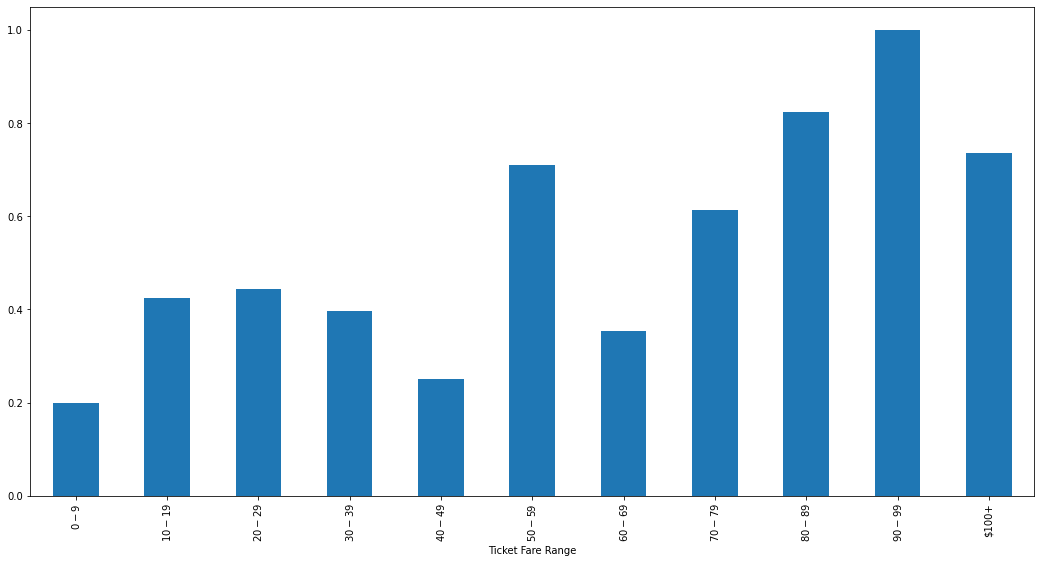

In [143]:
#Could you compare the ticket fare with the survival? Did more expensive tickets had higher chance of surviving?

#When viewing the resulting dataframe and bar chart below you can clearly see that those with my expensive tickets on the titanic
#Had a higher chance of survival

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 3000]
labels = ['$0-$9', '$10-$19','$20-$29', '$30-$39', '$40-$49', '$50-$59', '$60-$69', '$70-$79', '$80-$89', '$90-$99', '$100+']
titanic['Ticket Fare Range'] = pd.cut(titanic.Fare, bins, labels = labels,include_lowest = True)

titanic_passenger_fare = titanic[['Name', 'Ticket Fare Range']]
titanic_passenger_fare = titanic_passenger_fare.dropna().groupby('Ticket Fare Range').count()

titanic_survivors_fare = titanic[titanic['Survived'] == 1]
titanic_survivors_fare = titanic_survivors_fare[['Ticket Fare Range', 'Survived']]
titanic_passenger_fare ['Survivor Count'] = titanic_survivors_fare.groupby('Ticket Fare Range').count()


titanic_passenger_fare ['Ticket Fare Survival Rate'] = titanic_passenger_fare ['Survivor Count'] / titanic_passenger_fare ['Name']
titanic_passenger_fare 


titanic_passenger_fare ['Ticket Fare Survival Rate'].plot.bar(figsize=(18,9))